In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [3]:

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [4]:

# Load and preprocess data
def load_medical_mnist_dataset(data_dir):
    # List to store images and labels
    images = []
    labels = []
    
    # Mapping of folder names to class labels
    class_mapping = {}
    
    # Iterate through class folders
    for idx, class_folder in enumerate(sorted(os.listdir(data_dir))):
        class_path = os.path.join(data_dir, class_folder)
        
        # Skip if not a directory
        if not os.path.isdir(class_path):
            continue
        
        # Map folder name to class index
        class_mapping[class_folder] = idx
        
        # Load images from this class
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            
            # Load and convert image to array
            img = load_img(img_path, target_size=(64, 64), color_mode='grayscale')
            img_array = img_to_array(img)
            
            images.append(img_array)
            labels.append(idx)
    
    # Convert to numpy arrays
    X = np.array(images)
    y = np.array(labels)
    print("Class Mapping:", class_mapping)
    return X, y, class_mapping


In [5]:

# Set data directory
data_dir = 'data'  # Adjust this to your actual data folder path

# Load dataset
X, y, class_mapping = load_medical_mnist_dataset(data_dir)


# Normalize pixel values
X = X / 255.0

# Split the data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


Class Mapping: {'AbdomenCT': 0, 'BreastMRI': 1, 'CXR': 2, 'ChestCT': 3, 'Hand': 4, 'HeadCT': 5}


In [6]:

# Build CNN model
def create_medical_mnist_model():
    cnn = tf.keras.models.Sequential([
        # First Convolution Block
        tf.keras.layers.Conv2D(filters=64, kernel_size=7, activation="relu", padding="same", 
                                input_shape=[64, 64, 1]),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        
        # Second Convolution Block
        tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
        tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        
        # Third Convolution Block
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
        tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        
        # Flatten and Dense Layers
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=64, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=6, activation="softmax")  # 6 classes for medical MNIST
    ])
    
    return cnn


In [7]:

# Create and compile the model
cnn = create_medical_mnist_model()
cnn.summary()

# Compile the model
cnn.compile(loss="sparse_categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

# Train the model
history = cnn.fit(
    X_train, y_train, 
    batch_size=32, 
    epochs=10, 
    validation_data=(X_valid, y_valid)
)


c:\Users\029471596\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,215,814 (12.27 MB)

 Trainable params: 3,215,814 (12.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 844s 707ms/step - accuracy: 0.8005 - loss: 0.5096 - val_accuracy: 0.9955 - val_loss: 0.0203
Epoch 2/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 826s 678ms/step - accuracy: 0.9828 - loss: 0.0637 - val_accuracy: 0.9969 - val_loss: 0.0110
Epoch 3/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 856s 726ms/step - accuracy: 0.9847 - loss: 0.0548 - val_accuracy: 0.9982 - val_loss: 0.0090
Epoch 4/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 7729s 7s/step - accuracy: 0.9898 - loss: 0.0313 - val_accuracy: 0.9983 - val_loss: 0.0071
Epoch 5/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 892s 755ms/step - accuracy: 0.9859 - loss: 0.0547 - val_accuracy: 0.9978 - val_loss: 0.0131
Epoch 6/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 786s 666ms/step - accuracy: 0.9924 - loss: 0.0269 - val_accuracy: 0.9988 - val_loss: 0.0078
Epoch 7/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 781s 661ms/step - accuracy: 0.9935 - loss: 0.0202 - val_accuracy: 0.9986 - val_loss: 0.0096
Epoch 8/10
1180/1180 ━━━━━━━━━━━━━━━━━━━━ 792s 671ms/step - accu

In [12]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])
# Evaluate the model
score = cnn.evaluate(X_test, y_test)
print('Total loss on Testing Set:', score[0])
print('Accuracy of Testing Set:', score[1])

# Prediction and Visualization
X_new = X_test[:3]
y_pred = np.argmax(cnn.predict(X_new), axis=-1)

# Get class names (reverse the mapping)
class_names = {v: k for k, v in class_mapping.items()}


Training Accuracy: 0.9965279698371887
Validation Accuracy: 0.999151885509491
369/369 ━━━━━━━━━━━━━━━━━━━━ 119s 320ms/step - accuracy: 0.9993 - loss: 0.0037
Total loss on Testing Set: 0.00576848816126585
Accuracy of Testing Set: 0.9989822506904602
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


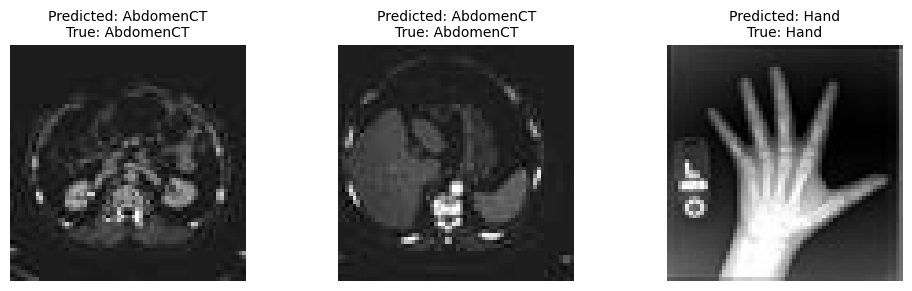

In [9]:

# Visualization of predictions
plt.figure(figsize=(10, 3))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image.squeeze(), cmap="gray", interpolation="nearest")
    plt.axis('off')
    plt.title(f"Predicted: {class_names[y_pred[index]]}\nTrue: {class_names[y_test[index]]}", fontsize=10)
plt.tight_layout()
plt.show()


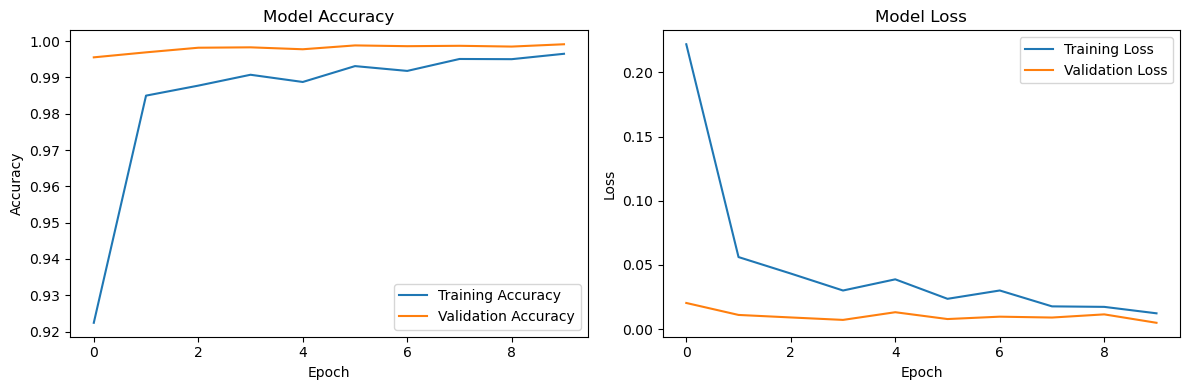

In [10]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()